In [1]:
import os
os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [2]:
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.stats as stats
from scipy.interpolate import RegularGridInterpolator, griddata
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime as dt
from netCDF4 import Dataset
import h5py
import xarray as xr
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
import cftime
import matplotlib.lines as mlines
import glob
import re
from scipy.io import savemat, loadmat
# from cmethods import adjust
# from climQMBC.methods import QDM

In [3]:
prefix = '/data/rong4/Data/'
prefix2 = '/data/rong3/achang1029/'
prefix3 = '/data/rong1/achang1029/'
prefix4 = '/data/amazon1/achang1029/'

In [ ]:
t2_fname_sa = 'ERA5/3hourly/85W-30W_35S-15N/era5.t2.1979-2018.85W-30W.35S-15N.3h.nc'
d2_fname_sa = 'ERA5/3hourly/85W-30W_35S-15N/era5.d2.1979-2018.85W-30W.35S-15N.3h.nc'
t2_fname_19_21_sa = 'ERA5/3hourly/85W-30W_35S-15N/era5.t2.2019-2021.85W-30W.35S-15N.3h.nc'
d2_fname_19_21_sa = 'ERA5/3hourly/85W-30W_35S-15N/era5.d2.2019-2021.85W-30W.35S-15N.3h.nc'

t2file_sa = xr.open_dataset(prefix + t2_fname_sa, chunks={'time':30,'latitude':201,'longitude':221}) #1979-2018
d2file_sa = xr.open_dataset(prefix + d2_fname_sa, chunks={'time':30,'latitude':201,'longitude':221}) #1979-2018
t2file_19_21_sa = xr.open_dataset(prefix + t2_fname_19_21_sa, chunks={'time':30,'latitude':201,'longitude':221}) #2019-2021
d2file_19_21_sa = xr.open_dataset(prefix + d2_fname_19_21_sa, chunks={'time':30,'latitude':201,'longitude':221}) #2019-2021

t2_sa = t2file_sa['t2m']
d2_sa = d2file_sa['d2m']
t2_19_21_sa = t2file_19_21_sa['t2m']
d2_19_21_sa = d2file_19_21_sa['d2m']


In [61]:
t2_sa = xr.concat([t2_sa, t2_19_21_sa[:-448,0,:,:].drop_vars('expver'), t2_19_21_sa[-448:,1,:,:].drop_vars('expver')], dim='time')
d2_sa = xr.concat([d2_sa, d2_19_21_sa[:-448,0,:,:].drop_vars('expver'), d2_19_21_sa[-448:,1,:,:].drop_vars('expver')], dim='time')

In [62]:
#2021 only goes to first 178 days. Remove 2021 here
t2max_sa = t2_sa[:-1408,:,:].coarsen(time=8).max().convert_calendar('noleap','time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()
d2max_sa = d2_sa[:-1408,:,:].coarsen(time=8).max().convert_calendar('noleap','time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

t2min_sa = t2_sa[:-1408,:,:].coarsen(time=8).min().convert_calendar('noleap','time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()
d2min_sa = d2_sa[:-1408,:,:].coarsen(time=8).min().convert_calendar('noleap','time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

t2_sa = t2_sa[:-1408,:,:].coarsen(time=8).mean().convert_calendar('noleap','time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()
d2_sa = d2_sa[:-1408,:,:].coarsen(time=8).mean().convert_calendar('noleap','time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a

In [63]:
#2021-Nov 2023
t2_fname_21_23_sa = 'ERA5/hourly/t2m_hourly_sa_2021-2023.nc'
d2_fname_21_23_sa = 'ERA5/hourly/d2m_hourly_sa_2021-2023.nc'

t2file_21_23_sa = xr.open_dataset(prefix2 + t2_fname_21_23_sa, chunks={'time':30,'latitude':201,'longitude':221}) #2021-2023
d2file_21_23_sa = xr.open_dataset(prefix2 + d2_fname_21_23_sa, chunks={'time':30,'latitude':201,'longitude':221}) #2021-2023

In [64]:
#Dec 2023
t2_fname_dec23_sa = 'ERA5/hourly/t2m_hourly_sa_dec2023.nc'
d2_fname_dec23_sa = 'ERA5/hourly/d2m_hourly_sa_dec2023.nc'

t2file_dec23_sa = xr.open_dataset(prefix2 + t2_fname_dec23_sa, chunks={'time':30,'latitude':201,'longitude':221}) #2021-2023
d2file_dec23_sa = xr.open_dataset(prefix2 + d2_fname_dec23_sa, chunks={'time':30,'latitude':201,'longitude':221}) #2021-2023

In [65]:
#Dec 2023 data invalid in this file. Omitted below (-744)
t2_21_23_sa = t2file_21_23_sa.to_array()[0,:-744,0,:,:].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()
d2_21_23_sa = d2file_21_23_sa.to_array()[0,:-744,0,:,:].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

t2max_21_23_sa = t2file_21_23_sa.to_array()[0,:-744,0,:,:].coarsen(time=24, boundary='trim').max().convert_calendar('noleap', 'time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()
d2max_21_23_sa = d2file_21_23_sa.to_array()[0,:-744,0,:,:].coarsen(time=24, boundary='trim').max().convert_calendar('noleap', 'time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

t2min_21_23_sa = t2file_21_23_sa.to_array()[0,:-744,0,:,:].coarsen(time=24, boundary='trim').min().convert_calendar('noleap', 'time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()
d2min_21_23_sa = d2file_21_23_sa.to_array()[0,:-744,0,:,:].coarsen(time=24, boundary='trim').min().convert_calendar('noleap', 'time')#.coarsen(latitude=4, boundary='trim').mean().coarsen(longitude=4, boundary='trim').mean()

/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a

In [66]:
#Dec 2023 data calculated here
t2_dec23 = t2file_dec23_sa.to_array()[0,:,:,:].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time')
d2_dec23 = d2file_dec23_sa.to_array()[0,:,:,:].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time')

t2max_dec23 = t2file_dec23_sa.to_array()[0,:,:,:].coarsen(time=24, boundary='trim').max().convert_calendar('noleap', 'time')
d2max_dec23 = d2file_dec23_sa.to_array()[0,:,:,:].coarsen(time=24, boundary='trim').max().convert_calendar('noleap', 'time')

t2min_dec23 = t2file_dec23_sa.to_array()[0,:,:,:].coarsen(time=24, boundary='trim').min().convert_calendar('noleap', 'time')
d2min_dec23 = d2file_dec23_sa.to_array()[0,:,:,:].coarsen(time=24, boundary='trim').min().convert_calendar('noleap', 'time')

/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a

In [67]:
t2_sa = xr.concat([t2_sa, t2_21_23_sa], dim='time')
d2_sa = xr.concat([d2_sa, d2_21_23_sa], dim='time')

t2max_sa = xr.concat([t2max_sa, t2max_21_23_sa], dim='time')
d2max_sa = xr.concat([d2max_sa, d2max_21_23_sa], dim='time')

t2min_sa = xr.concat([t2min_sa, t2min_21_23_sa], dim='time')
d2min_sa = xr.concat([d2min_sa, d2min_21_23_sa], dim='time')

t2_sa = xr.concat([t2_sa, t2_dec23], dim='time')
d2_sa = xr.concat([d2_sa, d2_dec23], dim='time')

t2max_sa = xr.concat([t2max_sa, t2max_dec23], dim='time')
d2max_sa = xr.concat([d2max_sa, d2max_dec23], dim='time')

t2min_sa = xr.concat([t2min_sa, t2min_dec23], dim='time')
d2min_sa = xr.concat([d2min_sa, d2min_dec23], dim='time')

In [68]:
t2_sa.to_netcdf(prefix2 + 'ERA5/daily/t2_daily_sa_1979-2023.nc', unlimited_dims='time')
d2_sa.to_netcdf(prefix2 + 'ERA5/daily/d2_daily_sa_1979-2023.nc', unlimited_dims='time')

In [69]:
t2max_sa.to_netcdf(prefix2 + 'ERA5/daily/t2max_daily_sa_1979-2023.nc', unlimited_dims='time')
d2max_sa.to_netcdf(prefix2 + 'ERA5/daily/d2max_daily_sa_1979-2023.nc', unlimited_dims='time')

t2min_sa.to_netcdf(prefix2 + 'ERA5/daily/t2min_daily_sa_1979-2023.nc', unlimited_dims='time')
d2min_sa.to_netcdf(prefix2 + 'ERA5/daily/d2min_daily_sa_1979-2023.nc', unlimited_dims='time')

In [99]:
slhf = xr.open_mfdataset(prefix2 + 'ERA5/hourly/slhf_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':121})
sshf = xr.open_mfdataset(prefix2 + 'ERA5/hourly/sshf_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':121})

In [100]:
slhf = slhf.to_array()[0,:,:,:221]
sshf = sshf.to_array()[0,:,:,:221]

In [37]:
slhf = slhf.coarsen(time=24).mean().convert_calendar('noleap', 'time')
sshf = sshf.coarsen(time=24).mean().convert_calendar('noleap', 'time')

In [38]:
slhf.to_netcdf(prefix2 + 'ERA5/daily/slhf_daily_sa_1979-2023.nc', unlimited_dims='time')
sshf.to_netcdf(prefix2 + 'ERA5/daily/sshf_daily_sa_1979-2023.nc', unlimited_dims='time')

In [3]:
tcc = xr.open_mfdataset(prefix2 + 'ERA5/hourly/tcc_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':121})

In [4]:
tcc = tcc.coarsen(time=24).mean().convert_calendar('noleap', 'time')

In [6]:
tcc.to_netcdf(prefix2 + 'ERA5/daily/tcc_daily_sa_1979-2023.nc', unlimited_dims='time')

In [141]:
tp = xr.open_mfdataset(prefix2 + 'ERA5/hourly/tp_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':121})
tp = tp.coarsen(time=24).mean().convert_calendar('noleap', 'time')
tp.to_netcdf(prefix2 + 'ERA5/daily/tp_daily_sa_1979-2023.nc', unlimited_dims='time')

In [11]:
ssr = xr.open_mfdataset(prefix2 + 'ERA5/hourly/ssr_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
ssr = ssr.coarsen(time=24).mean().convert_calendar('noleap', 'time')
ssr.to_netcdf(prefix2 + 'ERA5/daily/ssr_daily_sa_1979-2023.nc', unlimited_dims='time')

In [12]:
sthr = xr.open_mfdataset(prefix2 + 'ERA5/hourly/str_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
sthr = sthr.coarsen(time=24).mean().convert_calendar('noleap', 'time')
sthr.to_netcdf(prefix2 + 'ERA5/daily/str_daily_sa_1979-2023.nc', unlimited_dims='time')

In [10]:
z500 = xr.open_mfdataset(prefix2 + 'ERA5/hourly/z500_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
z500 = z500.to_array()[0,:,:,:,0].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time')
z500.to_netcdf(prefix2 + 'ERA5/daily/z500_daily_sa_1979-2023.nc', unlimited_dims='time')

In [9]:
r500 = xr.open_mfdataset(prefix2 + 'ERA5/hourly/r500_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
r500 = r500.to_array()[0,:,:,:,0].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time')
r500.to_netcdf(prefix2 + 'ERA5/daily/r500_daily_sa_1979-2023.nc', unlimited_dims='time')

/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [3]:
cin = xr.open_mfdataset(prefix2 + 'ERA5/hourly/cin_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
cin = cin.to_array()[0,:,:,:].coarsen(valid_time=24, boundary='trim').mean().convert_calendar('noleap', 'valid_time').drop(['expver', 'number'])
cin.to_netcdf(prefix2 + 'ERA5/daily/cin_daily_sa_1979-2023.nc', unlimited_dims='valid_time')

/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/tmp/ipykernel_40641/2473036870.py:2: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  cin = cin.to_array()[0,:,:,:].coarsen(valid_time=24, boundary='tri

In [8]:
cape = xr.open_mfdataset(prefix2 + 'ERA5/hourly/cape_hourly_sa_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
cape = cape.to_array()[0,:,:,:].coarsen(valid_time=24, boundary='trim').mean().convert_calendar('noleap', 'valid_time').drop(['expver', 'number'])
cape.to_netcdf(prefix2 + 'ERA5/daily/cape_daily_sa_1979-2023.nc', unlimited_dims='valid_time')

/tmp/ipykernel_39068/473730687.py:2: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  cape = cape.to_array()[0,:,:,:].coarsen(valid_time=24, boundary='trim').mean().convert_calendar('noleap', 'valid_time').drop(['expver', 'number'])
/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/data/rong3/achang1029

In [ ]:
u500 = xr.open_mfdataset(prefix2 + 'ERA5/hourly/u500_u850_hourly_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
u500 = u500.to_array()[0,:,0,300:501,1100:1321].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time').to_numpy()

v500 = xr.open_mfdataset(prefix2 + 'ERA5/hourly/v500_hourly_*.nc', chunks={'time':30,'latitude':201,'longitude':221})
v500 = v500.to_array()[0,:,:,:].coarsen(time=24, boundary='trim').mean().convert_calendar('noleap', 'time').to_numpy()

/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)

KeyboardInterrupt



In [28]:
vpd_lon_array_sa = np.arange(-85, -29.9, 0.25)
vpd_lat_array_sa = np.arange(15, -35.1, -0.25)

sa_lon_array = np.arange(-65, -49.9, 0.25)
sa_lat_array = np.arange(-5, -17.1, -0.25)


KeyboardInterrupt



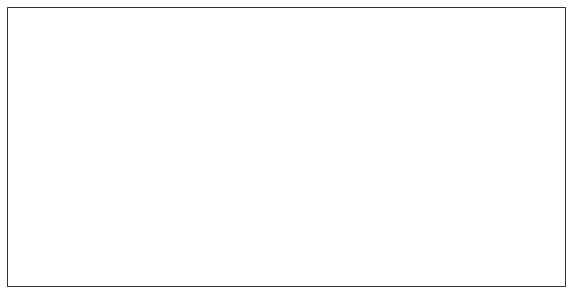

In [31]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
cs = plt.contourf(vpd_lon_array_sa, vpd_lat_array_sa, np.mean(u500, axis=0), levels=10, extend='both')
ax.set_xticks(np.arange(-180, 181, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 5), crs=ccrs.PlateCarree())
ax.set_facecolor("gray")
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([-85, -30, -35, 15])
plt.show()

CPC Precipitation

In [6]:
precip = xr.open_mfdataset(prefix2 + 'CPC/*.nc')
precip = precip.to_array()[0,:,:,:].convert_calendar('noleap', 'time')
precip.to_netcdf(prefix2 + 'CPC/precip_1979-2023.nc', unlimited_dims='time')

/data/rong3/achang1029/anaconda3/envs/healpix/lib/python3.9/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


CMIP6 non-ensembles

In [5]:
precip = xr.open_mfdataset(prefix2 + 'CPC/*.nc')
precip = precip.to_array()[0,:,:,:].convert_calendar('noleap', 'time')
precip.to_netcdf(prefix2 + 'CPC/precip.1979-2023.nc', unlimited_dims='time')

TypeError: cannot compare cftime.DatetimeNoLeap(1979, 1, 1, 0, 0, 0, 0, has_year_zero=True) and Timestamp('1979-01-01 00:00:00') (different calendars)

In [382]:
tas_EC_historical = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_EC*historical*')['tas']
tas_CNRM_historical = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM-CM6-1_*historical*')['tas']
tas_CNRM_HR_historical = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM*HR*historical*')['tas']
tas_CNRM_ESM2_historical = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM*ESM2*historical*')['tas']
tas_CanESM5_historical = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CanESM5*historical*')['tas']
tas_IPSL_historical = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_IPSL*historical*')['tas']

tas_EC_585 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_EC*585*')['tas']
tas_CNRM_585 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM-CM6-1_*585*')['tas']
tas_CNRM_HR_585 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM*HR*585*')['tas']
tas_CNRM_ESM2_585 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM*ESM2*585*')['tas']
tas_CanESM5_585 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CanESM5*585*')['tas']
tas_IPSL_585 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_IPSL*585*')['tas']

tas_EC_245 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_EC*245*')['tas']
tas_CNRM_245 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM-CM6-1_*245*')['tas']
tas_CNRM_HR_245 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM*HR*245*')['tas']
tas_CNRM_ESM2_245 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CNRM*ESM2*245*')['tas']
tas_CanESM5_245 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_CanESM5*245*')['tas']
tas_IPSL_245 = xr.open_mfdataset(prefix2 + 'CMIP6/tas_Amon_IPSL*245*')['tas']

In [383]:
hurs_EC_historical = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_EC*historical*')['hurs']
hurs_CNRM_historical = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM-CM6-1_*historical*')['hurs']
hurs_CNRM_HR_historical = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM*HR*historical*')['hurs']
hurs_CNRM_ESM2_historical = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM*ESM2*historical*')['hurs']
hurs_CanESM5_historical = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CanESM5*historical*')['hurs']
hurs_IPSL_historical = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_IPSL*historical*')['hurs']

hurs_EC_585 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_EC*585*')['hurs']
hurs_CNRM_585 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM-CM6-1_*585*')['hurs']
hurs_CNRM_HR_585 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM*HR*585*')['hurs']
hurs_CNRM_ESM2_585 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM*ESM2*585*')['hurs']
hurs_CanESM5_585 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CanESM5*585*')['hurs']
hurs_IPSL_585 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_IPSL*585*')['hurs']

hurs_EC_245 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_EC*245*')['hurs']
hurs_CNRM_245 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM-CM6-1_*245*')['hurs']
hurs_CNRM_HR_245 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM*HR*245*')['hurs']
hurs_CNRM_ESM2_245 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CNRM*ESM2*245*')['hurs']
hurs_CanESM5_245 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_CanESM5*245*')['hurs']
hurs_IPSL_245 = xr.open_mfdataset(prefix2 + 'CMIP6/hurs_Amon_IPSL*245*')['hurs']

In [400]:
tas_EC_245

<xarray.DataArray 'tas' (time: 1032, lat: 71, lon: 78)>
dask.array<open_dataset-703234b1d7f1a3f9f4bdaba465a2b544tas, shape=(1032, 71, 78), dtype=float32, chunksize=(1032, 71, 78), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lat      (lat) float64 -34.74 -34.04 -33.33 -32.63 ... 12.98 13.68 14.39
  * lon      (lon) float64 275.6 276.3 277.0 277.7 ... 327.7 328.4 329.1 329.8
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-12-24T12:22:36Z altered by CMOR: Treated scalar dime...

In [407]:
tmp = (tas_EC_245 + hurs_EC_245) / 2
tmp.assign_attrs(tas_EC_245.attrs)

<xarray.DataArray (time: 1032, lat: 71, lon: 78)>
dask.array<truediv, shape=(1032, 71, 78), dtype=float32, chunksize=(1032, 71, 78), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lat      (lat) float64 -34.74 -34.04 -33.33 -32.63 ... 12.98 13.68 14.39
  * lon      (lon) float64 275.6 276.3 277.0 277.7 ... 327.7 328.4 329.1 329.8
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-12-24T12:22:36Z altered by CMOR: Treated scalar dime...

In [409]:
tmp.coords

Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lat      (lat) float64 -34.74 -34.04 -33.33 -32.63 ... 12.98 13.68 14.39
  * lon      (lon) float64 275.6 276.3 277.0 277.7 ... 327.7 328.4 329.1 329.8
    height   float64 2.0

In [6]:
def svp(x): #Temperature in K, Pressure in Pa
    return 610.8 * np.exp(17.27 * (x - 273.15) / (x - 35.85))

In [78]:
vpd_EC_historical = svp(tas_EC_historical) * (1 - hurs_EC_historical/100)
vpd_CNRM_historical = svp(tas_CNRM_historical) * (1 - hurs_CNRM_historical/100)
vpd_CNRM_HR_historical = svp(tas_CNRM_HR_historical) * (1 - hurs_CNRM_HR_historical/100)
vpd_CNRM_ESM2_historical = svp(tas_CNRM_ESM2_historical) * (1 - hurs_CNRM_ESM2_historical/100)
vpd_CanESM5_historical = svp(tas_CanESM5_historical) * (1 - hurs_CanESM5_historical/100)
vpd_IPSL_historical = svp(tas_IPSL_historical) * (1 - hurs_IPSL_historical/100)

vpd_EC_585 = svp(tas_EC_585) * (1 - hurs_EC_585/100)
vpd_CNRM_585 = svp(tas_CNRM_585) * (1 - hurs_CNRM_585/100)
vpd_CNRM_HR_585 = svp(tas_CNRM_HR_585) * (1 - hurs_CNRM_HR_585/100)
vpd_CNRM_ESM2_585 = svp(tas_CNRM_ESM2_585) * (1 - hurs_CNRM_ESM2_585/100)
vpd_CanESM5_585 = svp(tas_CanESM5_585) * (1 - hurs_CanESM5_585/100)
vpd_IPSL_585 = svp(tas_IPSL_585) * (1 - hurs_IPSL_585/100)

vpd_EC_245 = svp(tas_EC_245) * (1 - hurs_EC_245/100)
vpd_CNRM_245 = svp(tas_CNRM_245) * (1 - hurs_CNRM_245/100)
vpd_CNRM_HR_245 = svp(tas_CNRM_HR_245) * (1 - hurs_CNRM_HR_245/100)
vpd_CNRM_ESM2_245 = svp(tas_CNRM_ESM2_245) * (1 - hurs_CNRM_ESM2_245/100)
vpd_CanESM5_245 = svp(tas_CanESM5_245) * (1 - hurs_CanESM5_245/100)
vpd_IPSL_245 = svp(tas_IPSL_245) * (1 - hurs_IPSL_245/100)

In [422]:
vpd_EC_245.rename('vpd')

<xarray.DataArray 'vpd' (time: 1032, lat: 71, lon: 78)>
dask.array<mul, shape=(1032, 71, 78), dtype=float32, chunksize=(1032, 71, 78), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lat      (lat) float64 -34.74 -34.04 -33.33 -32.63 ... 12.98 13.68 14.39
  * lon      (lon) float64 275.6 276.3 277.0 277.7 ... 327.7 328.4 329.1 329.8
    height   float64 2.0

In [79]:
vpd_EC_historical.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_EC_historical.nc', unlimited_dims='time')
vpd_CNRM_historical.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_historical.nc', unlimited_dims='time')
vpd_CNRM_HR_historical.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_HR_historical.nc', unlimited_dims='time')
vpd_CNRM_ESM2_historical.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_ESM2_historical.nc', unlimited_dims='time')
vpd_CanESM5_historical.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CanESM5_historical.nc', unlimited_dims='time')
vpd_IPSL_historical.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_IPSL_historical.nc', unlimited_dims='time')

vpd_EC_585.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_EC_585.nc', unlimited_dims='time')
vpd_CNRM_585.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_585.nc', unlimited_dims='time')
vpd_CNRM_HR_585.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_HR_585.nc', unlimited_dims='time')
vpd_CNRM_ESM2_585.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_ESM2_585.nc', unlimited_dims='time')
vpd_CanESM5_585.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CanESM5_585.nc', unlimited_dims='time')
vpd_IPSL_585.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_IPSL_585.nc', unlimited_dims='time')

vpd_EC_245.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_EC_245.nc', unlimited_dims='time')
vpd_CNRM_245.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_245.nc', unlimited_dims='time')
vpd_CNRM_HR_245.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_HR_245.nc', unlimited_dims='time')
vpd_CNRM_ESM2_245.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CNRM_ESM2_245.nc', unlimited_dims='time')
vpd_CanESM5_245.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_CanESM5_245.nc', unlimited_dims='time')
vpd_IPSL_245.to_netcdf(prefix2 + 'CMIP6/vpd_Amon_IPSL_245.nc', unlimited_dims='time')

CMIP6: Convert AWI-CM-1-1-MR, NESM3, BCC-CSM2-MR hur data into hurs data

In [38]:
#MONTHLY
model = 'NESM3'
for experiment in [#'historical', 
                   'ssp126', 
                   'ssp245', 
                   'ssp585']:
    if experiment='historical':
        time_string = '185001-201412'
    else:
        time_string = '201501-210012'
    hurs_file = xr.open_mfdataset(prefix4 + 'CMIP6/r1i1p1f1_monthly/hur_data/hur_Amon_'+model+'_'+experiment+'_*r1i1p1f1*.nc')
    hurs_file = hurs_file.rename({"hur":"hurs"})
    hurs_file = hurs_file.sel(plev=100000)
    hurs_file.to_netcdf(prefix4 + 'CMIP6/r1i1p1f1_monthly/hurs_Amon_'+model+'_'+experiment+'_r1i1p1f1_gn_'+time_string+'.nc', unlimited_dims='time')

In [ ]:
#DAILY
model = 'NESM3'
for experiment in ['historical', 
                   'ssp126', 
                   'ssp245', 
                   'ssp585']:
    if experiment='historical':
        time_string = '18500101-20141231'
    else:
        time_string = '20150101-21001231'
    hurs_file = xr.open_mfdataset(prefix4 + 'CMIP6/r1i1p1f1_daily/hur_data/hur_day_'+model+'_'+experiment+'_*r1i1p1f1*.nc')
    hurs_file = hurs_file.rename({"hur":"hurs"})
    hurs_file = hurs_file.sel(plev=100000)
    hurs_file.to_netcdf(prefix4 + 'CMIP6/r1i1p1f1_day/hurs_day_'+model+'_'+experiment+'_r1i1p1f1_gn_'+time_string+'.nc', unlimited_dims='time')

Creation of CMIP6 Model and Ensembles List (OUTDATED)

In [73]:
# hurs_histnat_files = os.listdir(prefix + '/CMIP6/paper8/hurs_hist-nat/')
# hurs_historical_files = os.listdir(prefix + '/CMIP6/paper8/hurs_historical/')
# hurs_ssp245_files = os.listdir(prefix + '/CMIP6/paper8/hurs_ssp245/')
# hurs_ssp585_files = os.listdir(prefix + '/CMIP6/paper8/hurs_ssp585/')

# tasmin_histnat_files = os.listdir(prefix + '/CMIP6/paper8/tasmin_hist-nat/')
# tasmin_historical_files = os.listdir(prefix + '/CMIP6/paper8/tasmin_historical/')
# tasmin_ssp245_files = os.listdir(prefix + '/CMIP6/paper8/tasmin_ssp245/')
# tasmin_ssp585_files = os.listdir(prefix + '/CMIP6/paper8/tasmin_ssp585/')

# tasmax_histnat_files = os.listdir(prefix + '/CMIP6/paper8/tasmax_hist-nat/')
# tasmax_historical_files = os.listdir(prefix + '/CMIP6/paper8/tasmax_historical/')
# tasmax_ssp245_files = os.listdir(prefix + '/CMIP6/paper8/tasmax_ssp245/')
# tasmax_ssp585_files = os.listdir(prefix + '/CMIP6/paper8/tasmax_ssp585/')

# ssp126_files = os.listdir(prefix2 + '/CMIP6/ensembles/ssp126_raw/')

In [74]:
# hurs_histnat_fname = glob.glob(prefix + '/CMIP6/paper8/hurs_hist-nat/*')
# hurs_historical_fname = glob.glob(prefix + '/CMIP6/paper8/hurs_historical/*')
# hurs_ssp126_fname = glob.glob(prefix2 + '/CMIP6/ensembles/ssp126_raw/hurs*')
# hurs_ssp245_fname = glob.glob(prefix + '/CMIP6/paper8/hurs_ssp245/*')
# hurs_ssp585_fname = glob.glob(prefix + '/CMIP6/paper8/hurs_ssp585/*')

# tasmin_histnat_fname = glob.glob(prefix + '/CMIP6/paper8/tasmin_hist-nat/*')
# tasmin_historical_fname = glob.glob(prefix + '/CMIP6/paper8/tasmin_historical/*')
# tasmin_ssp126_fname = glob.glob(prefix2 + '/CMIP6/ensembles/ssp126_raw/tasmin*')
# tasmin_ssp245_fname = glob.glob(prefix + '/CMIP6/paper8/tasmin_ssp245/*')
# tasmin_ssp585_fname = glob.glob(prefix + '/CMIP6/paper8/tasmin_ssp585/*')

# tasmax_histnat_fname = glob.glob(prefix + '/CMIP6/paper8/tasmax_hist-nat/*')
# tasmax_historical_fname = glob.glob(prefix + '/CMIP6/paper8/tasmax_historical/*')
# tasmax_ssp126_fname = glob.glob(prefix2 + '/CMIP6/ensembles/ssp126_raw/tasmax*')
# tasmax_ssp245_fname = glob.glob(prefix + '/CMIP6/paper8/tasmax_ssp245/*')
# tasmax_ssp585_fname = glob.glob(prefix + '/CMIP6/paper8/tasmax_ssp585/*')

In [75]:
def generate_files_dataframe(filelist):
    df = pd.DataFrame({'fname':filelist})
    paths = df['fname']
    df = df[df['fname'].str.contains(".sh") == False]
    df = df[df['fname'].str.contains("backup") == False]
    df = df['fname'].str.split("_", expand=True)
    df.columns = ['Variable', "Amon", 'Model', 'Experiment', 'Ensemble', 'gr', 'Time Period']
    df['Full Path'] = paths
    df = df.sort_values("Model")
    return df

In [76]:
def group_by_model(filelist):
    files_model_groups = generate_files_dataframe(filelist).groupby(["Model", "Experiment"]).agg(np.unique)
    files_model_groups = files_model_groups[files_model_groups['Variable'].str.len() == 3]
    ensembles = files_model_groups.reset_index()[['Model', 'Ensemble']]
    return ensembles

In [83]:
# #Combine all file paths, filter to ones with histnat, historical, ssp126, ssp245, and ssp585 in all.
# #Also filters for ensemble members with all data
# filelist_concatenated = hurs_histnat_files + hurs_historical_files + hurs_ssp245_files + hurs_ssp585_files + tasmin_histnat_files + tasmin_historical_files + tasmin_ssp245_files + tasmin_ssp585_files + tasmax_histnat_files + tasmax_historical_files + tasmax_ssp245_files + tasmax_ssp585_files + ssp126_files

# ensembles = group_by_model(filelist_concatenated)

# #Only list models that have all experiments
# model_list = (ensembles.groupby("Model").size() == 4)
# model_list = model_list[model_list]
# model_list = model_list.index.to_list()
# ensembles = ensembles[ensembles['Model'].isin(model_list)]

# #Only list ensemble ids that have all experiments
# ensemble_list = []
# for i in range(len(model_list)):
#     histnat_ensembles = ensembles['Ensemble'].iloc[4*i]
#     hist_ensembles = ensembles['Ensemble'].iloc[4*i+1]
#     ssp245_ensembles = ensembles['Ensemble'].iloc[4*i+2]
#     ssp585_ensembles = ensembles['Ensemble'].iloc[4*i+3]
#     ensemble_list.append(np.intersect1d(np.intersect1d(hist_ensembles, ssp245_ensembles), ssp585_ensembles))

In [84]:
# final_models_df = pd.DataFrame([model_list, ensemble_list],).T
# final_models_df.columns = ['Model', 'Ensemble']
# final_models_df = final_models_df[final_models_df['Ensemble'].str.len() > 0]
# final_models_df = final_models_df.reset_index()[['Model', 'Ensemble']]

In [90]:
# final_models_df.to_pickle("/data/rong3/achang1029/SA_output/CMIP6_models_ensembles_list.pkl")

In [85]:
# model_names = final_models_df.to_dict()['Model']
# ensemble_ids = final_models_df.to_dict()['Ensemble']

In [86]:
# model_names

{0: 'ACCESS-CM2',
 1: 'ACCESS-ESM1-5',
 2: 'CNRM-CM6-1-HR',
 3: 'CanESM5',
 4: 'FGOALS-g3',
 5: 'GFDL-ESM4',
 6: 'GISS-E2-1-G',
 7: 'HadGEM3-GC31-LL',
 8: 'IPSL-CM6A-LR',
 9: 'MIROC6',
 10: 'MRI-ESM2-0'}

In [87]:
# ensemble_ids

{0: array(['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1'],
       dtype=object),
 1: array(['r10i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1',
        'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1'],
       dtype=object),
 2: array(['r1i1p1f2'], dtype=object),
 3: array(['r11i1p1f1', 'r11i1p2f1', 'r12i1p1f1', 'r12i1p2f1', 'r13i1p1f1',
        'r13i1p2f1', 'r14i1p1f1', 'r14i1p2f1', 'r15i1p1f1', 'r15i1p2f1',
        'r16i1p1f1', 'r16i1p2f1', 'r17i1p1f1', 'r17i1p2f1', 'r18i1p1f1',
        'r18i1p2f1', 'r19i1p1f1', 'r19i1p2f1', 'r1i1p1f1', 'r1i1p2f1',
        'r20i1p1f1', 'r20i1p2f1', 'r21i1p1f1', 'r21i1p2f1', 'r22i1p1f1',
        'r22i1p2f1', 'r23i1p1f1', 'r23i1p2f1', 'r24i1p1f1', 'r24i1p2f1',
        'r25i1p1f1', 'r25i1p2f1', 'r2i1p1f1', 'r2i1p2f1', 'r3i1p1f1',
        'r3i1p2f1', 'r4i1p1f1', 'r4i1p2f1', 'r5i1p1f1', 'r5i1p2f1',
        'r6i1p1f1', 'r6i1p2f1', 'r8i1p2f1', 'r9i1p1f1', 'r9i1p2f1'],
       dtype=object),
 4: array(['r1i1p1f1', 'r2i1p1f1', '

CMIP6 Monthly Ensembles

In [5]:
# cmip6_model_list = pd.read_pickle(prefix2 + 'SA_output/CMIP6_models_ensembles_list.pkl')[['Model', 'Ensemble']]
# model_names = cmip6_model_list.to_dict()['Model']
# ensemble_ids = cmip6_model_list.to_dict()['Ensemble']

In [6]:
def hurs_to_d2m(t2m, hurs): #Temperature in K, Relative Humidity as a % (0-100)
    t2m -= 273.15 #Temporarily Convert to C   
    d2m = t2m - ((100 - hurs) / 5) #from https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html
    
    d2m += 273.15 #Convert back to K
    return d2m

In [7]:
def d2m_to_hurs(t2m, d2m): #Temperature in K, Relative Humidity as a % (0-100)
    t2m -= 273.15
    d2m -= 273.15
    
    hurs = 100*(np.exp((17.625*d2m)/(243.04+d2m))/np.exp((17.625*t2m)/(243.04+t2m)))
    
    return hurs

In [8]:
def convert_daily_to_monthly(x):
    daily = x.reshape(-1, 365, x.shape[1], x.shape[2])
    
    month_indices = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    
    monthly = np.empty((daily.shape[0], 12, daily.shape[2], daily.shape[3]))
    for i in range(12):
        monthly[:,i,:,:] = np.mean(daily[:,month_indices[i]:month_indices[i+1],:,:], axis=1)
    
    return monthly.reshape(monthly.shape[0] * 12, monthly.shape[2], monthly.shape[3])

In [411]:
#Save to matlab after condensing into region of focus
# t2_sa = Dataset(prefix2 + 'ERA5/1deg_daily/t2_1deg_daily_sa_1979-2023.nc').variables['t2m'][:]
# d2_sa = Dataset(prefix2 + 'ERA5/1deg_daily/d2_1deg_daily_sa_1979-2023.nc').variables['d2m'][:]       
# t2max_sa = Dataset(prefix2 + 'ERA5/1deg_daily/t2max_1deg_daily_sa_1979-2023.nc').variables['t2m'][:]
# t2min_sa = Dataset(prefix2 + 'ERA5/1deg_daily/t2min_1deg_daily_sa_1979-2023.nc').variables['t2m'][:]

# t2_monthly = convert_daily_to_monthly(t2_sa)[:,20:32, 20:35]
# d2_monthly = convert_daily_to_monthly(d2_sa)[:,20:32, 20:35]
# t2max_monthly = convert_daily_to_monthly(t2max_sa)[:,20:32, 20:35]
# t2min_monthly = convert_daily_to_monthly(t2min_sa)[:,20:32, 20:35]

# savemat(prefix2 + 'ERA5/monthly_mat/t2_monthly.mat', {'t2':t2_monthly.T})
# savemat(prefix2 + 'ERA5/monthly_mat/d2_monthly.mat', {'d2':d2_monthly.T})
# savemat(prefix2 + 'ERA5/monthly_mat/t2max_monthly.mat', {'t2max':t2max_monthly.T})
# savemat(prefix2 + 'ERA5/monthly_mat/t2min_monthly.mat', {'t2min':t2min_monthly.T})

In [4]:
model_list = ['MPI-ESM1-2-HR',
'MPI-ESM1-2-LR',
'MIROC6',
#'FGOALS-g3', missing a few years in ssp2 and ssp5 data
#'ACCESS-CM2', # in /rong3
#'ACCESS-ESM1-5', # in /rong3
'CMCC-ESM2',
'CanESM5',
#'EC-Earth3', #missing a lot of ssp 1 and 2 data
'GFDL-ESM4',
'HadGEM3-GC31-LL',
'INM-CM4-8',
'INM-CM5-0',
'IPSL-CM6A-LR',
'KACE-1-0-G',
#'EC-Earth3-Veg', #missing a lot of ssp 1 and 2 data
#'AWI-CM-1-1-MR', #NOTE: hurs historical runs are based on 1000 hPa, not the surface since that is what was available
'EC-Earth3-Veg-LR',
'MRI-ESM2-0',
'NorESM2-LM', 
'NorESM2-MM', 
#'EC-Earth3-CC', #missing ssp1 data
#'BCC-CSM2-MR', #NOTE: hurs ssp runs are based on 1000 hPa, not the surface since that is what was available
'CMCC-CM2-SR5',
#'NESM3', #NOTE: hurs data for ssp runs based on 1000 hPa, not the surface since that is what was available
#'KIOST-ESM', #missing historical data
#'IITM-ESM', #missing a lot of data
'TaiESM1']
#'CAS-ESM2-0'] #missing ssp5 data
#'FIO-ESM-2-0'] data still downloading, might not exist
#'CanESM5-1', #missing various ssp1, 2 data
#'CIESM', #missing humidity data
#'AWI-ESM-1-1-LR', #missing all ssp data
#'MPI-ESM-1-2-HAM', #missing all ssp data
#'EC-Earth3-AerChem', #missing all ssp data
#'FGOALS-f3-L', #missing temperature data
#'GISS-E2-1-G', #missing all ssp data
#'SAM0-UNICON', #missing all ssp data
#'GISS-E2-2-G', #missing all ssp data
#'BCC-ESM1', #missing all ssp data
#'CESM2-WACCM', #missing a lot of data, can't find online
#'IPSL-CM5A2-INCA', #missing a lot of data
#'IPSL-CM6A-LR-INCA', #missing all ssp data
#'GISS-E2-1-G-CC', #missing all ssp data
#'GISS-E2-1-H', #missing all ssp data
#'GISS-E2-2-H', #missing all ssp data
#'CESM2', #these models are all missing data
# 'AWI-ESM-1-REcoM',
# 'CMCC-CM2-HR4',
# 'E3SM-1-0',
# 'NorCPM1',
# 'CESM2-FV2',
# 'CESM2-WACCM-FV2',
# 'E3SM-1-1-ECA',
# 'E3SM-2-0',
# 'E3SM-2-0-NARRM',
# 'E3SM-2-1',
# 'MCM-UA-1-0']

In [28]:
# np_array_of_strings = np.zeros((len(model_list),), dtype=np.object_)
# np_array_of_strings[:] = model_list

# savemat('/home/achang1029/SA/CMIP6 Bias Correction Matlab Files/model_list.mat', {'models':np_array_of_strings})

In [15]:
#Load regridded data to save to matlab after condensing into region of focus
for experiment in ['historical', 'ssp126', 'ssp245', 'ssp585']:
    for model in model_list:
        ens = 'r1i1p1f1'
        try:
            hurs_file = np.load(prefix4 + 'CMIP6/regridded/monthly/hurs_Amon_' + model + '_' + experiment + '_' + ens + '_regridded.npy')[:,95:107,-65:-50]
            tasmin_file = np.load(prefix4 + 'CMIP6/regridded/monthly/tasmin_Amon_' + model + '_' + experiment + '_' + ens + '_regridded.npy')[:,95:107,-65:-50]
            tasmax_file = np.load(prefix4 + 'CMIP6/regridded/monthly/tasmax_Amon_' + model + '_' + experiment + '_' + ens + '_regridded.npy')[:,95:107,-65:-50]

            savemat(prefix4 + 'CMIP6/regridded/monthly/mat_files/hurs_Amon_' + model + '_' + experiment + '_' + ens + '_regridded.mat', {'hurs':hurs_file.T})
            savemat(prefix4 + 'CMIP6/regridded/monthly/mat_files/tasmin_Amon_' + model + '_' + experiment + '_' + ens + '_regridded.mat', {'tasmin':tasmin_file.T})
            savemat(prefix4 + 'CMIP6/regridded/monthly/mat_files/tasmax_Amon_' + model + '_' + experiment + '_' + ens + '_regridded.mat', {'tasmax':tasmax_file.T})

            print(experiment, model)

        except OSError as e:
            print(e)
#             print("At least one missing ensemble. Continuing to next combination...")
            continue

historical MPI-ESM1-2-HR
historical MPI-ESM1-2-LR
historical MIROC6
historical ACCESS-ESM1-5


KeyboardInterrupt: 

In [54]:
#Load bias-corrected matlab data and convert to npy
for experiment in ['ssp126', 'ssp245', 'ssp585']:
    for model in model_list:
        ens = 'r1i1p1f1'
        try:
#                 d2m_file = loadmat(prefix4 + 'CMIP6/bias_corrected/mat_files/d2m_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T
#                 d2min_file = loadmat(prefix4 + 'CMIP6/bias_corrected/mat_files/d2min_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected_min'].T
#                 d2max_file = loadmat(prefix4 + 'CMIP6/bias_corrected/mat_files/d2max_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected_max'].T
            tasmin_file = loadmat(prefix4 + 'CMIP6/bias_corrected/monthly/mat_files/tasmin_Amon_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T
            tasmax_file = loadmat(prefix4 + 'CMIP6/bias_corrected/monthly/mat_files/tasmax_Amon_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T
#                 tas_file = ((tasmin_file + tasmax_file) / 2)

#                 print(np.sum(tas_file < d2m_file))

#                 hurs = d2m_to_hurs(tas_file, d2m_file)

#                 print(np.sum(hurs > 100))
#                 print(hurs)

            #Calculations to convert to VPD, es, ea here

            es_file = (svp(tasmin_file) + svp(tasmax_file)) / 2
            ea_file = loadmat(prefix4 + 'CMIP6/bias_corrected/monthly/mat_files/ea_Amon_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T

            vpd_file = es_file - ea_file

            np.save(prefix4 + 'CMIP6/bias_corrected/monthly/es_Amon_' + model + '_' + experiment + '_' + ens, es_file)            
            np.save(prefix4 + 'CMIP6/bias_corrected/monthly/ea_Amon_' + model + '_' + experiment + '_' + ens, ea_file)    
            np.save(prefix4 + 'CMIP6/bias_corrected/monthly/vpd_Amon_' + model + '_' + experiment + '_' + ens, vpd_file)
            
            print(experiment, model)
        except OSError as e:
            print(e)
#             print("At least one missing ensemble. Continuing to next combination...")
            continue

ssp126 MPI-ESM1-2-HR
ssp126 MPI-ESM1-2-LR
ssp126 MIROC6
ssp126 FGOALS-g3
ssp126 ACCESS-CM2
ssp126 ACCESS-ESM1-5
ssp126 CMCC-ESM2
ssp126 CanESM5
ssp126 EC-Earth3
ssp126 GFDL-ESM4
ssp126 INM-CM4-8
ssp126 INM-CM5-0
ssp126 IPSL-CM6A-LR
ssp126 EC-Earth3-Veg
ssp126 EC-Earth3-Veg-LR
ssp126 MRI-ESM2-0
ssp126 CMCC-CM2-SR5
ssp126 CAS-ESM2-0
ssp126 FIO-ESM-2-0
ssp245 MPI-ESM1-2-HR
ssp245 MPI-ESM1-2-LR
ssp245 MIROC6
ssp245 FGOALS-g3
ssp245 ACCESS-CM2
ssp245 ACCESS-ESM1-5
ssp245 CMCC-ESM2
ssp245 CanESM5
ssp245 EC-Earth3
ssp245 GFDL-ESM4
ssp245 INM-CM4-8
ssp245 INM-CM5-0
ssp245 IPSL-CM6A-LR
ssp245 EC-Earth3-Veg
ssp245 EC-Earth3-Veg-LR
ssp245 MRI-ESM2-0
ssp245 CMCC-CM2-SR5
ssp245 CAS-ESM2-0
ssp245 FIO-ESM-2-0
ssp585 MPI-ESM1-2-HR
ssp585 MPI-ESM1-2-LR
ssp585 MIROC6
ssp585 FGOALS-g3
ssp585 ACCESS-CM2
ssp585 ACCESS-ESM1-5
ssp585 CMCC-ESM2
ssp585 CanESM5
ssp585 EC-Earth3
ssp585 GFDL-ESM4
ssp585 INM-CM4-8
ssp585 INM-CM5-0
ssp585 IPSL-CM6A-LR
ssp585 EC-Earth3-Veg
ssp585 EC-Earth3-Veg-LR
ssp585 MRI-ESM2-0
s

CMIP6 Daily Ensembles

In [34]:
#Load regridded data to save to matlab after condensing into region of focus
for variable in ['hurs', 'tasmin', 'tasmax']:
    for experiment in ['historical', 'ssp126', 'ssp245', 'ssp585']:
        for model in model_list:
            if model == 'HadGEM3-GC31-LL':
                ens = 'r1i1p1f3'
            else:
                ens = 'r1i1p1f1'
            try:
                print(experiment, model)
                if os.path.exists(prefix4 + 'CMIP6/regridded/daily/mat_files/' + variable + '_day_' + model + '_' + experiment + '_' + ens + '_regridded.mat'):
                    print("Already converted to .mat")
                    continue
                
                file = np.load(prefix4 + 'CMIP6/regridded/daily/' + variable + '_day_' + model + '_' + experiment + '_' + ens + '_regridded.npy')[:,95:107,-65:-50]

                savemat(prefix4 + 'CMIP6/regridded/daily/mat_files/' + variable + '_day_' + model + '_' + experiment + '_' + ens + '_regridded.mat', {variable:file.T})

            except OSError as e:
                print(e)
#                 print("At least one missing ensemble. Continuing to next combination...")
                continue
            except EOFError as e:
                print(e)
                print("Currently regridding this file. Try again later.")
                continue

historical MPI-ESM1-2-HR
Already converted to .mat
historical MPI-ESM1-2-LR
Already converted to .mat
historical MIROC6
Already converted to .mat
historical CMCC-ESM2
Already converted to .mat
historical CanESM5
Already converted to .mat
historical GFDL-ESM4
Already converted to .mat
historical HadGEM3-GC31-LL
Already converted to .mat
historical INM-CM4-8
Already converted to .mat
historical INM-CM5-0
Already converted to .mat
historical IPSL-CM6A-LR
Already converted to .mat
historical KACE-1-0-G
historical EC-Earth3-Veg-LR
Already converted to .mat
historical MRI-ESM2-0
Already converted to .mat
historical NorESM2-LM
historical NorESM2-MM
historical CMCC-CM2-SR5
Already converted to .mat
historical TaiESM1
ssp126 MPI-ESM1-2-HR
Already converted to .mat
ssp126 MPI-ESM1-2-LR
Already converted to .mat
ssp126 MIROC6
Already converted to .mat
ssp126 CMCC-ESM2
Already converted to .mat
ssp126 CanESM5
Already converted to .mat
ssp126 GFDL-ESM4
Already converted to .mat
ssp126 HadGEM3-GC31-

In [7]:
#Load bias-corrected matlab data and convert to npy
for experiment in ['ssp126', 'ssp245', 'ssp585']:
    for model in model_list:
        try:
            print(experiment, model)
            if model == 'HadGEM3-GC31-LL':
                ens = 'r1i1p1f3'
            else:
                ens = 'r1i1p1f1'
    #                 d2m_file = loadmat(prefix2 + 'CMIP6/bias_corrected/daily/mat_files/d2m_day_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T
    #                 d2min_file = loadmat(prefix2 + 'CMIP6/bias_corrected/daily/mat_files/d2min_day_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected_min'].T
    #                 d2max_file = loadmat(prefix2 + 'CMIP6/bias_corrected/daily/mat_files/d2max_day_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected_max'].T
            tasmin_file = loadmat(prefix4 + 'CMIP6/bias_corrected/daily/mat_files/tasmin_day_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T
            tasmax_file = loadmat(prefix4 + 'CMIP6/bias_corrected/daily/mat_files/tasmax_day_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T
    #                 tas_file = ((tasmin_file + tasmax_file) / 2)

    #                 print(np.sum(tas_file < d2m_file))

    #                 hurs = d2m_to_hurs(tas_file, d2m_file)

    #                 print(np.sum(hurs > 100))
    #                 print(hurs)

            #Calculations to convert to VPD, es, ea here

            es_file = (svp(tasmin_file) + svp(tasmax_file)) / 2
            ea_file = loadmat(prefix4 + 'CMIP6/bias_corrected/daily/mat_files/ea_day_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T

            vpd_file = es_file - ea_file

            np.save(prefix4 + 'CMIP6/bias_corrected/daily/es_day_' + model + '_' + experiment + '_' + ens, es_file)            
            np.save(prefix4 + 'CMIP6/bias_corrected/daily/ea_day_' + model + '_' + experiment + '_' + ens, ea_file)    
            np.save(prefix4 + 'CMIP6/bias_corrected/daily/vpd_day_' + model + '_' + experiment + '_' + ens, vpd_file)
            
        except OSError as e:
            print(e)
#             print("At least one missing ensemble. Continuing to next combination...")
            continue

ssp126 MPI-ESM1-2-HR
ssp126 MPI-ESM1-2-LR
ssp126 MIROC6
ssp126 CMCC-ESM2
ssp126 CanESM5
ssp126 GFDL-ESM4
ssp126 HadGEM3-GC31-LL
ssp126 INM-CM4-8
ssp126 INM-CM5-0
ssp126 IPSL-CM6A-LR
ssp126 KACE-1-0-G
ssp126 EC-Earth3-Veg-LR
ssp126 MRI-ESM2-0
ssp126 NorESM2-LM
ssp126 NorESM2-MM
ssp126 CMCC-CM2-SR5
ssp126 TaiESM1
ssp245 MPI-ESM1-2-HR
ssp245 MPI-ESM1-2-LR
ssp245 MIROC6
ssp245 CMCC-ESM2
ssp245 CanESM5
ssp245 GFDL-ESM4
ssp245 HadGEM3-GC31-LL
ssp245 INM-CM4-8
ssp245 INM-CM5-0
ssp245 IPSL-CM6A-LR
ssp245 KACE-1-0-G
ssp245 EC-Earth3-Veg-LR
ssp245 MRI-ESM2-0
ssp245 NorESM2-LM
ssp245 NorESM2-MM
ssp245 CMCC-CM2-SR5
ssp245 TaiESM1
ssp585 MPI-ESM1-2-HR
ssp585 MPI-ESM1-2-LR
ssp585 MIROC6
ssp585 CMCC-ESM2
ssp585 CanESM5
ssp585 GFDL-ESM4
ssp585 HadGEM3-GC31-LL
ssp585 INM-CM4-8
ssp585 INM-CM5-0
ssp585 IPSL-CM6A-LR
ssp585 KACE-1-0-G
ssp585 EC-Earth3-Veg-LR
ssp585 MRI-ESM2-0
ssp585 NorESM2-LM
ssp585 NorESM2-MM
ssp585 CMCC-CM2-SR5
ssp585 TaiESM1


In [8]:
model='HadGEM3-GC31-LL'
experiment='ssp126'
ens='r1i1p1f3'

In [9]:
tasmin_file = loadmat(prefix4 + 'CMIP6/bias_corrected/daily/mat_files/tasmin_day_' + model + '_' + experiment + '_' + ens + '_corrected.mat')['corrected'].T

In [11]:
tasmin_file.shape

(43920, 12, 15)

In [69]:
testfile = loadmat(prefix4 + 'CMIP6/bias_corrected/monthly/mat_files/ea_Amon_' + model + '_ssp126_' + ens + '_corrected.mat')['corrected'].T
testfile2 = loadmat(prefix4 + 'CMIP6/bias_corrected/monthly/mat_files/ea_Amon_' + model + '_ssp245_' + ens + '_corrected.mat')['corrected'].T
testfile3 = loadmat(prefix4 + 'CMIP6/bias_corrected/monthly/mat_files/ea_Amon_' + model + '_ssp585_' + ens + '_corrected.mat')['corrected'].T

In [59]:
testfile1 = loadmat('/home/achang1029/SA/CMIP6 Bias Correction Matlab Files/d2_monthly.mat')['d2'].T

In [60]:
testfile1 = svp(testfile1)

In [61]:
jjaso_indices = np.arange(5, 10) #np.arange(151, 304)

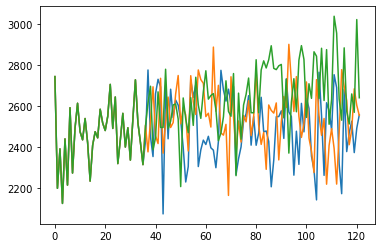

In [70]:
plt.plot(np.nanmean(testfile.reshape(-1, 12, 12, 15)[:,jjaso_indices,:,:], axis=(1,2,3)))
plt.plot(np.nanmean(testfile2.reshape(-1, 12, 12, 15)[:,jjaso_indices,:,:], axis=(1,2,3)))
plt.plot(np.nanmean(testfile3.reshape(-1, 12, 12, 15)[:,jjaso_indices,:,:], axis=(1,2,3)))
plt.show()

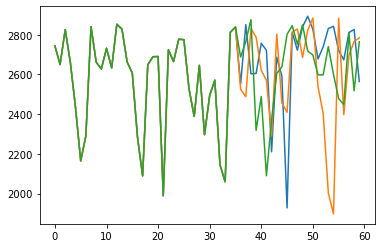

In [71]:
plt.plot(np.nanmean(testfile[12*33:12*38], axis=(1,2)))
plt.plot(np.nanmean(testfile2[12*33:12*38], axis=(1,2)))
plt.plot(np.nanmean(testfile3[12*33:12*38], axis=(1,2)))
plt.show()

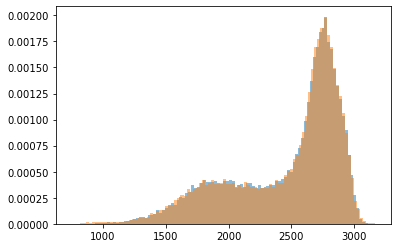

In [72]:
#Bias correction verification
plt.hist(testfile[:12*22].flatten(), bins=100, density=True, alpha=0.5)
plt.hist(testfile1[:12*22].flatten(), bins=100, density=True, alpha=0.5)
plt.show()

MODIS

In [45]:
def add_time_dim(ds):
    ds = ds.expand_dims({'time':1}, axis=0)
    return ds

In [59]:
def convert_modis_day_to_month(day, year): #Doesn't work for before 1900 and after 2100, but no data outside of the range
    if year % 4 == 0:
        x = {1:0, 32:1, 61:2, 92:3, 122:4, 153:5, 183:6, 214:7, 245:8, 275:9, 306:10, 336:11}
    else:    
        x = {1:0, 32:1, 60:2, 91:3, 121:4, 152:5, 182:6, 213:7, 244:8, 274:9, 305:10, 335:11}
    return x[day]

In [116]:
def coarsen_combine_modis(ds):
    #Uncomment the below for burn area
#     ds = ds.coarsen({'XDim:MOD_Grid_Monthly_500m_DB_BA':40}).mean().coarsen({'YDim:MOD_Grid_Monthly_500m_DB_BA':40}).mean()
    
    #Uncomment the below for percent tree cover
    ds = ds.coarsen({'XDim:MOD44B_250m_GRID':40}).mean(skipna=True).coarsen({'YDim:MOD44B_250m_GRID':40}).mean(skipna=True)
    return ds

In [62]:
#Convert all HDF files into nc files
for v in range(9, 11):
    for h in range(11, 14):
        for filename in os.listdir(prefix2 + 'MODIS/vcf/h' + str(h) + 'v' + str(v).zfill(2)):
            ds = xr.open_dataset(prefix2 + 'MODIS/vcf/h' + str(h) + 'v' + str(v).zfill(2) + '/' + filename, engine='netcdf4')['Percent_Tree_Cover']
            ds = add_time_dim(ds)
            yr = int(filename[8:12])
            dy = int(filename[12:15])
            mo = 2
            ds['time'] = [(yr-2000) * 12 + mo]
            ds.to_netcdf(prefix2 + 'MODIS/vcf/h' + str(h) + 'v' + str(v).zfill(2) + '_' + str(yr) + str(mo).zfill(2) + '.nc', unlimited_dims='time')

In [117]:
h11v09 = xr.open_mfdataset(prefix2 + 'MODIS/vcf/h11v09/h11v09*.nc')['Percent_Tree_Cover']
h11v10 = xr.open_mfdataset(prefix2 + 'MODIS/vcf/h11v10/h11v10*.nc')['Percent_Tree_Cover']
h12v09 = xr.open_mfdataset(prefix2 + 'MODIS/vcf/h12v09/h12v09*.nc')['Percent_Tree_Cover']
h12v10 = xr.open_mfdataset(prefix2 + 'MODIS/vcf/h12v10/h12v10*.nc')['Percent_Tree_Cover']
h13v09 = xr.open_mfdataset(prefix2 + 'MODIS/vcf/h13v09/h13v09*.nc')['Percent_Tree_Cover']
h13v10 = xr.open_mfdataset(prefix2 + 'MODIS/vcf/h13v10/h13v10*.nc')['Percent_Tree_Cover']

#Since VCF uses 200 and 253 for water and values outside of sinusoidal projection, filter out here before coarsening
h11v09 = xr.where(h11v09 > 100, np.nan, h11v09)
h11v10 = xr.where(h11v10 > 100, np.nan, h11v10)
h12v09 = xr.where(h12v09 > 100, np.nan, h12v09)
h12v10 = xr.where(h12v10 > 100, np.nan, h12v10)
h13v09 = xr.where(h13v09 > 100, np.nan, h13v09)
h13v10 = xr.where(h13v10 > 100, np.nan, h13v10)

In [118]:
h11v09 = coarsen_combine_modis(h11v09)
h11v10 = coarsen_combine_modis(h11v10)
h12v09 = coarsen_combine_modis(h12v09)
h12v10 = coarsen_combine_modis(h12v10)
h13v09 = coarsen_combine_modis(h13v09)
h13v10 = coarsen_combine_modis(h13v10)

In [119]:
h11 = xr.concat([h11v09, h11v10], dim='YDim:MOD44B_250m_GRID')
h12 = xr.concat([h12v09, h12v10], dim='YDim:MOD44B_250m_GRID')
h13 = xr.concat([h13v09, h13v10], dim='YDim:MOD44B_250m_GRID')

In [120]:
tree_cover = xr.concat([h11, h12, h13], dim='XDim:MOD44B_250m_GRID')

In [121]:
tree_cover.to_netcdf(prefix2 + 'MODIS/vcf/percent_tree_cover_2000-2023.nc', unlimited_dims='time')

In [122]:
vcf = Dataset(prefix2 + 'MODIS/vcf/percent_tree_cover_2000-2023.nc').variables['Percent_Tree_Cover'][:]

In [123]:
np.save(prefix2 + "SA_output/percent_tree_cover_2000-2023", vcf.data)

In [299]:
# for filename in os.listdir(prefix2 + 'MODIS/monthly/MCD64CMQ/'):
#     ds = xr.open_dataset(prefix2 + 'MODIS/monthly/MCD64CMQ/' + filename, engine='netcdf4')['BurnedArea']
#     ds = add_time_dim(ds)
#     yr = int(filename[10:14])
#     dy = int(filename[14:17])
#     mo = convert_modis_day_to_month(dy, yr)
#     ds['time'] = [(yr-2000) * 12 + mo]
#     ds.to_netcdf(prefix2 + 'MODIS/monthly/ncfiles/MCD64CMQ/burnarea_' + str(yr) + str(mo).zfill(2) + '.nc', unlimited_dims='time')

/tmp/ipykernel_3441/2219627375.py:8: SerializationWarning: saving variable BurnedArea with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds.to_netcdf(prefix2 + 'MODIS/monthly/ncfiles/MCD64CMQ/burnarea_' + str(yr) + str(mo).zfill(2) + '.nc', unlimited_dims='time')


In [300]:
# burn_area = xr.open_mfdataset(prefix2 + 'MODIS/monthly/ncfiles/MCD64CMQ/*.nc', engine='netcdf4')

In [302]:
# burn_area.to_netcdf(prefix2 + 'MODIS/monthly/MCD64CMQ/burnarea_2000-2022.nc', unlimited_dims='time')

/tmp/ipykernel_3441/3786521698.py:1: SerializationWarning: saving variable BurnedArea with floating point data as an integer dtype without any _FillValue to use for NaNs
  burn_area.to_netcdf(prefix2 + 'MODIS/monthly/MCD64CMQ/burnarea_2000-2022.nc', unlimited_dims='time')
